# MNIST Data Set - Basic Approach

## MNIST Data Set : 
- It is a collection of arrays representing hand written digits (0-9) using pixels.
- We'll see how we can user TensorFlow to help classify what number is written simply by training on the array values.
- Here we will use classical approach of using TF. In next series of notes we will use much simple estimator model.
- Estimator model is much easier to use with sklearn where you create some sort of input function and then train, predict it.
- First manual then input based.

### Get the MNIST Data

**Alternative sources of the data just in case:**

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
import warnings
warnings.filterwarnings("ignore")

mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist) # Shows that data type is specialised TF dataset

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images # Series of numpy arrays

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
mnist.train.images.shape # Means we have 55k images with 784 pixels per image.
# In a while we will see how to reshape these images, so that we can visualise these.

(55000, 784)

In [9]:
# To confirm how many images we have in train set
mnist.train.num_examples
# A lot of images to train on. Good for Neural Network as it will need a lot of data.

55000

In [11]:
# To confirm how many images we have in test set
mnist.test.num_examples

10000

### Visualizing the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline # To see stuff inside notebook

In [16]:
mnist.train.images[1].shape 
# 784 entries, which we need to reshape into 28 by 28 pixels as this is the actual shape of MNIST iamges. 28*28 = 784

(784,)

In [17]:
# Reshape the image
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

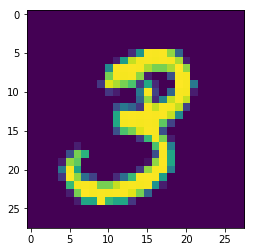

In [18]:
plt.imshow(mnist.train.images[1].reshape(28,28))
# Representing hand written digit using some sort of pixel value. 0 would be darkest shade and 1 is lightest shade.
# In array also for 28x28 shape 0 is present at corners that is wherever matrix value is (0,28) (0,0) (28,0) etc. and close
# to 1 i.e. 0.9-ish values for bright spots to show a yellow pixel where it is not dark and digit is there.

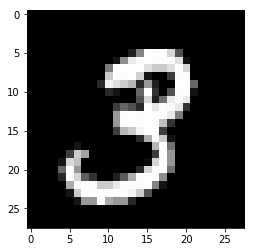

In [19]:
# You can also visualise these numbers in grayscale using cmap
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray') # Most of the online tutorials use this method.

NOTE : We won't pass the image as 28x28 array for neural network. Instead we will pass it in as 784x1 shape which it was originally. Essentially just as a vector of numbers.

Let's try to play around and try to visualise the values in a 784,1 vector reshape.
What we get is a really long vector and we are note able to see anything because those are single values and most of them are zero as well.

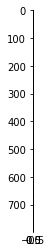

In [20]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray')

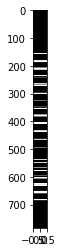

In [23]:
# We can change the aspect to get more visibility
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)
# Here we stretch out the vector, specifically bars representing the colors so we have better visualisation. We will pass this
# to neural network as vector of 784 pixels.